# Kartik Kandwal

# Task 3-EDA on Sample Super-Store Data

As a business manager, try to find out the weak areas where you can work to make more profit.
What all business problems you can derive by exploring the data?

In [1]:
#importing lib
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
 data.shape

(9994, 13)

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Chaecking the dupilication in data
data.duplicated().sum()

17

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
df=data.drop('Postal Code',axis=1)

In [10]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [11]:
data.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.027732e+09,-469412.768497,935.818272,391.989291,-224679.858643
Sales,-4.694128e+05,389028.396022,278.765576,-3.645637,70057.067126
Quantity,9.358183e+02,278.765576,4.958001,0.003990,34.565743
Discount,3.919893e+02,-3.645637,0.003990,0.042624,-10.632751
Profit,-2.246799e+05,70057.067126,34.565743,-10.632751,54970.478824


# EDA

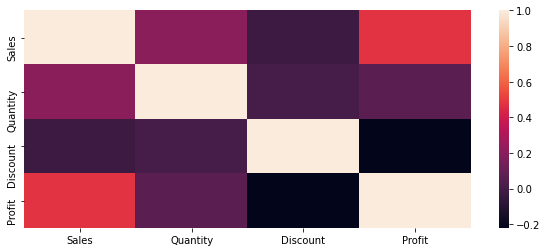

In [12]:
#Correlation coeffient among the numerical columns
plt.figure(figsize = (10, 4))
sns.heatmap(df.corr())
plt.show()

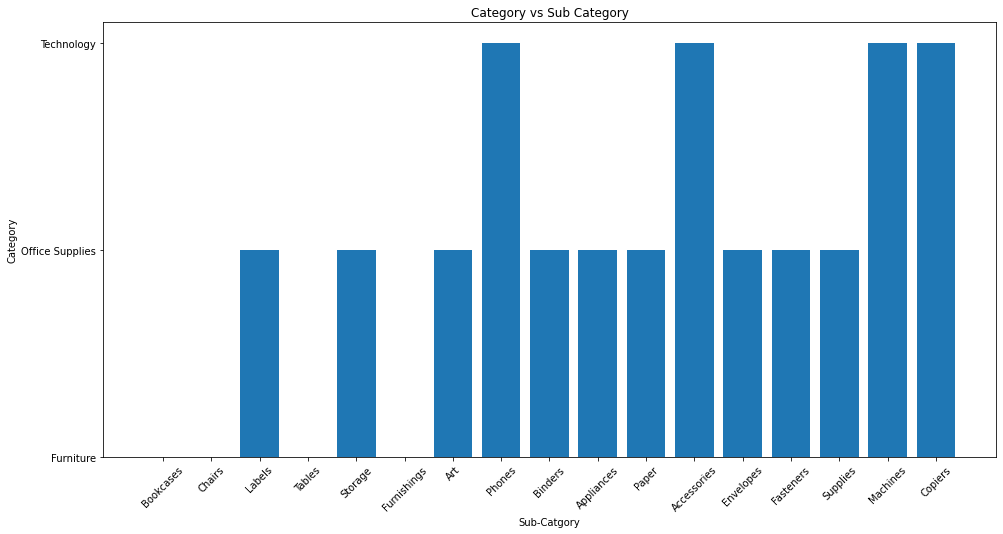

In [13]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

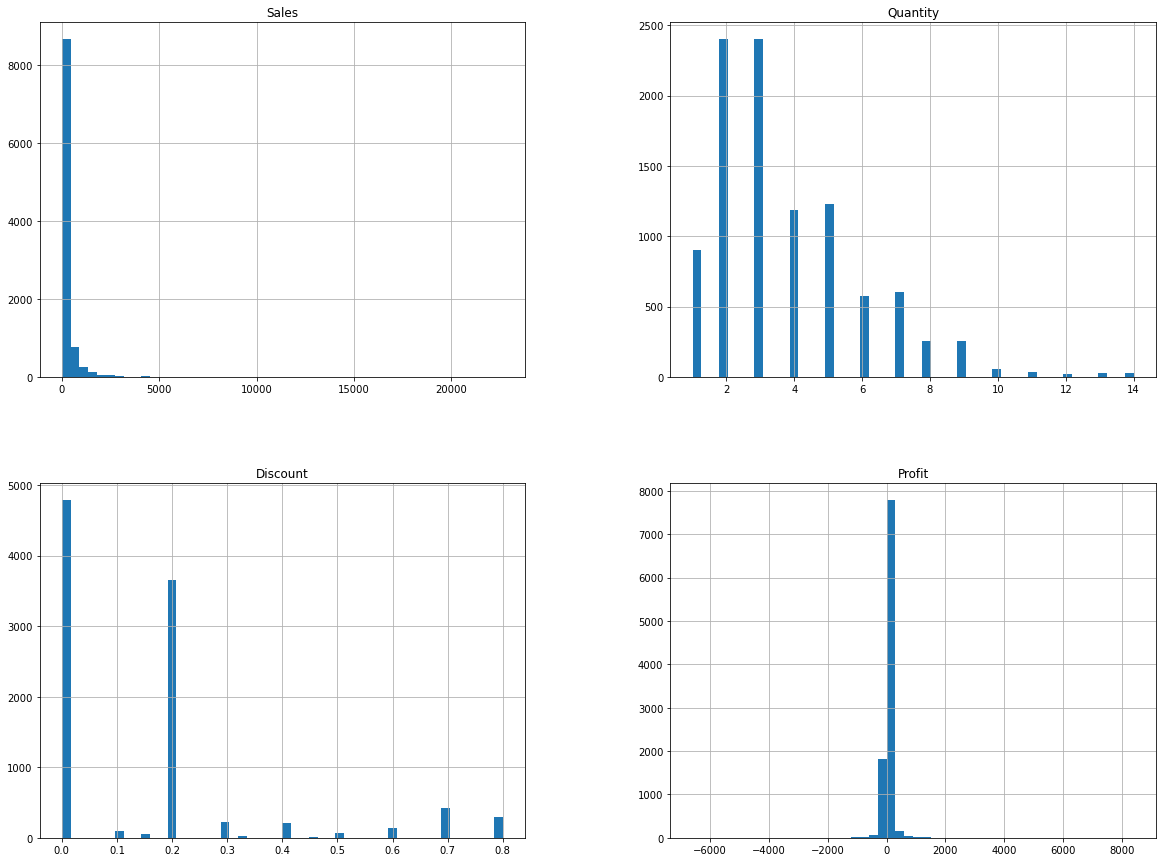

In [14]:
df.hist(bins=50 ,figsize=(20,15))
plt.show();

In [15]:
# Count the total repeatable states
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

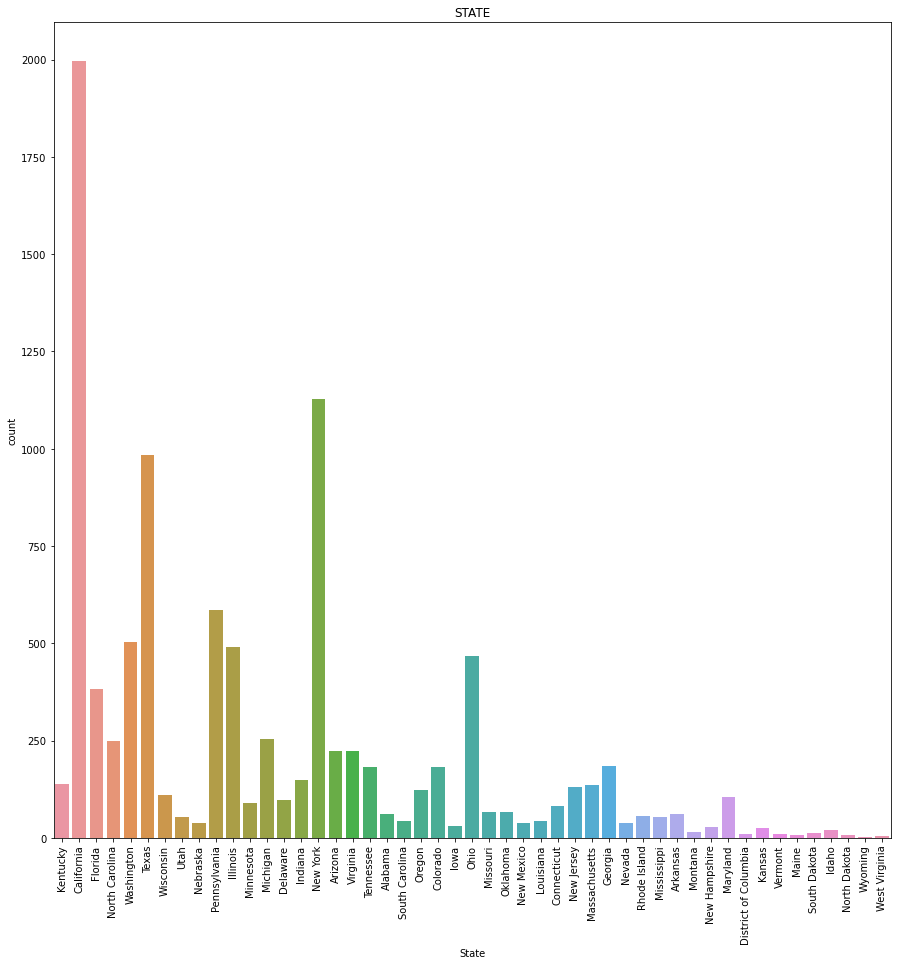

In [16]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

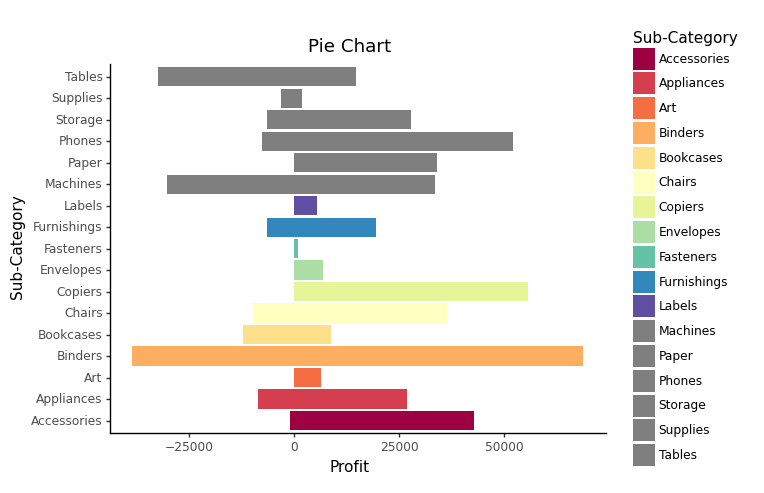

<ggplot: (151971848735)>

In [17]:
Profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

Above Pie chart Shows the profit and loss of each and every subcategories.Here from graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (For now we can't say that what is the reason it may be because of discounts given on binders subcategory)

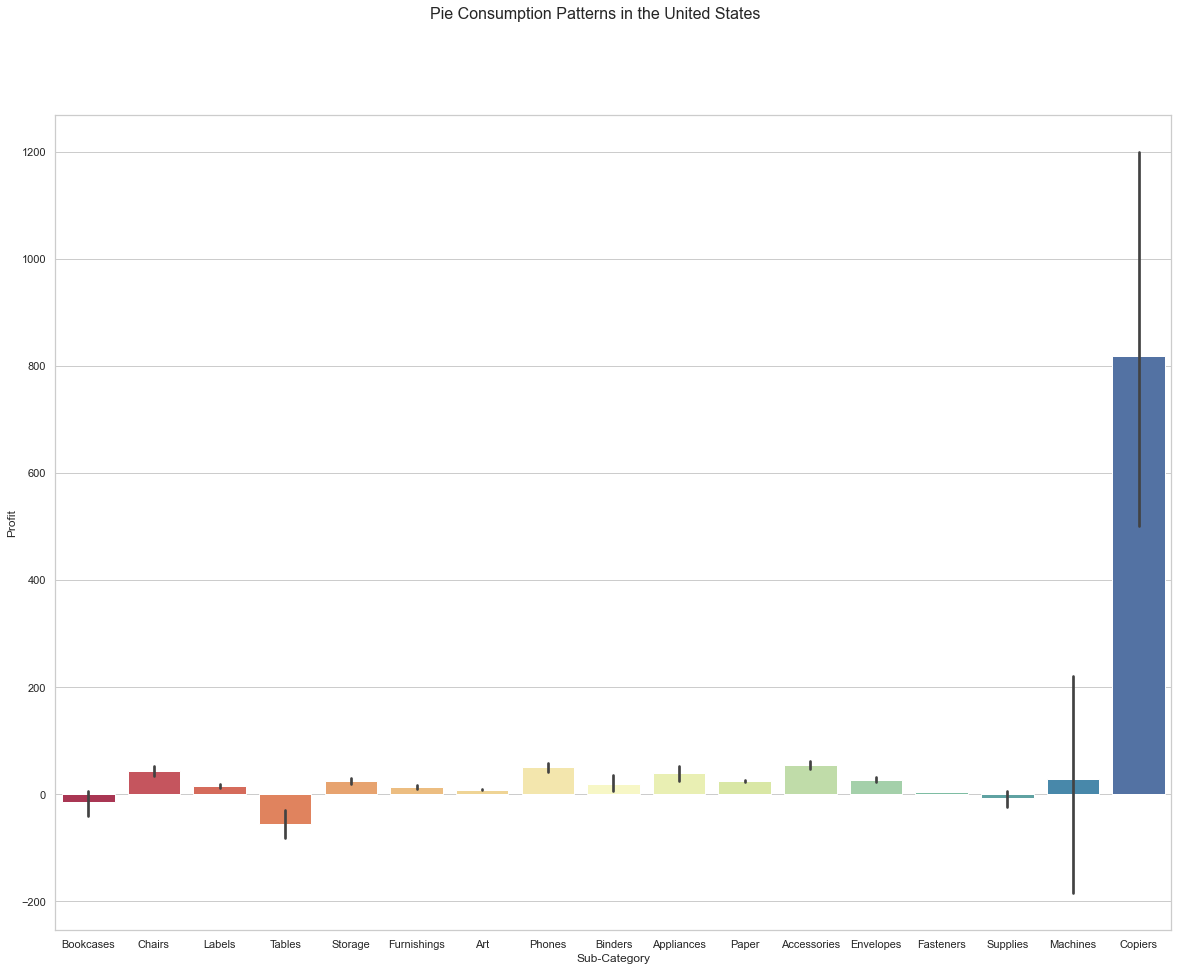

In [18]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))
sns.barplot(x='Sub-Category',y='Profit', data=df, palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

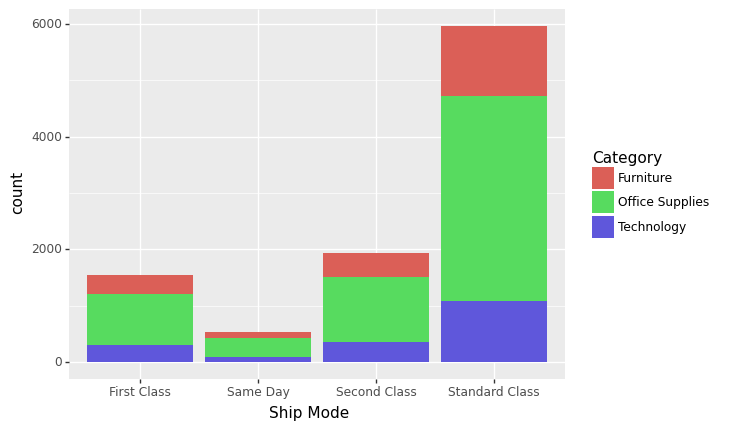

<ggplot: (151979452510)>

In [19]:
ggplot(df, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

<function matplotlib.pyplot.show(*args, **kw)>

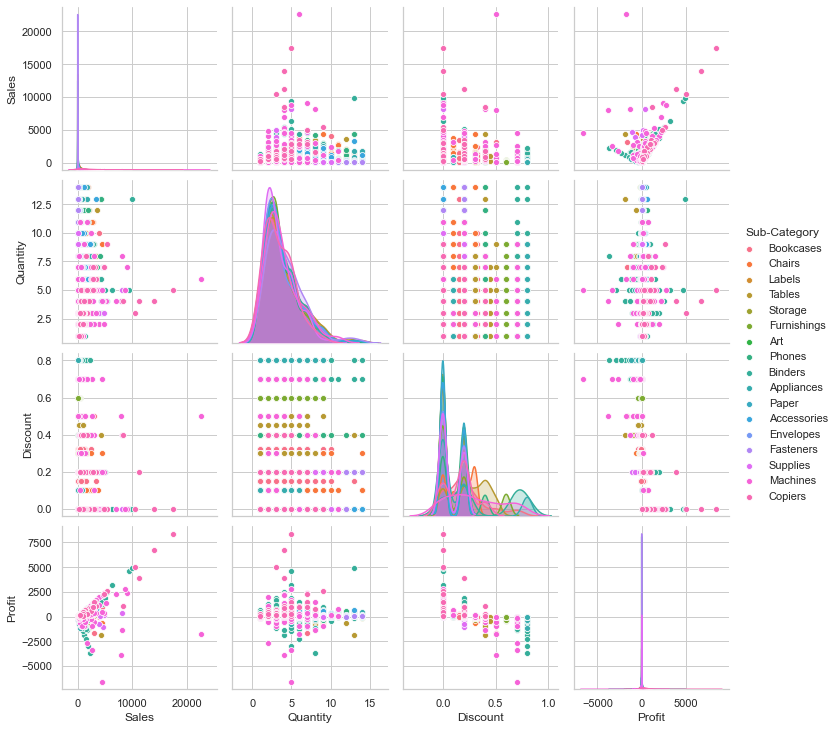

In [20]:
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')
plt.show

In [21]:
# region wise profit distribution
region_profit = df.groupby('Region').sum()['Profit']

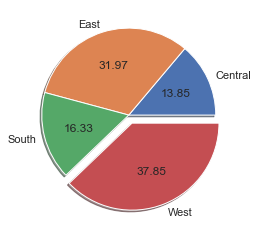

In [22]:
plt.pie(region_profit, labels=region_profit.index, autopct='%.2f', explode=(0,0,0,0.1), shadow=True)
plt.show()

In [23]:
products = df.groupby('Category').sum()['Sales']

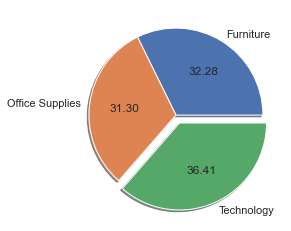

In [24]:
#Most sellable products are - 
plt.pie(products, labels=products.index, autopct='%.2f', explode=(0,0,0.1), shadow=True)
plt.show()

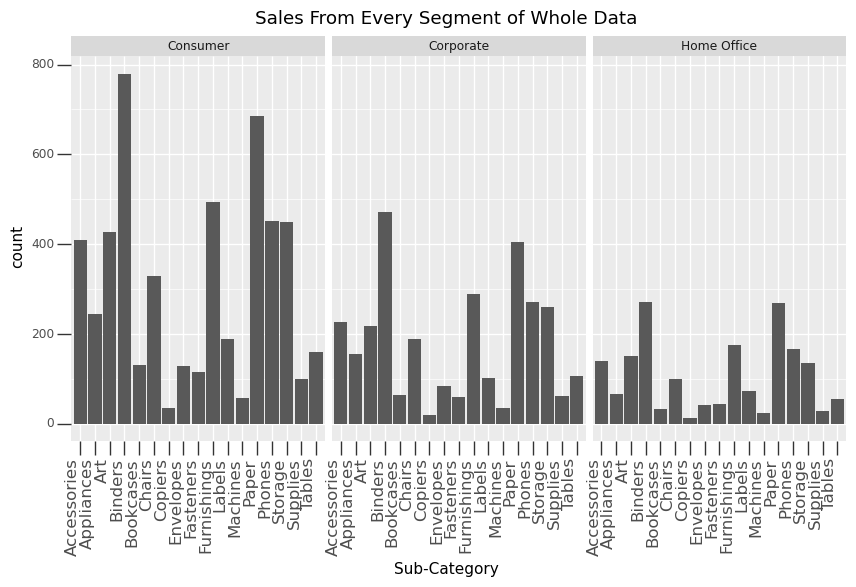

<ggplot: (151979298708)>

In [25]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment of Whole Data"))

From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that 
"Tables","Supplies","Machines","Copiers","Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

# CONCLUSION

Most profitable products are Copiers, Phones and Accessaries.

Most of the products are being purchased by the consumers.

Most sellable products are Phones and Binders

Less sell in Coporate and Home Office